이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from torchvision import transforms
import torch
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 60,000개의 이미지가 있음
# 각 이미지는 28x28 픽셀로 표현
x_train.shape

(60000, 28, 28)

In [5]:
# 이미지가 0~9번으로 분류되어 있음
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# 0 T-shirt/top# 
1 Trouser# 
2 Pullove# r
3 Dre# ss
4 C# oat
5 Sa# ndal
6 # Shirt
7 S# neaker# 9
8 Bag
9 Ankle bootnkle boot

SyntaxError: invalid syntax (202504613.py, line 3)

In [7]:
# 60,000개 레이블 존재
len(y_train)

60000

### Data중 첫 번째 이미지를 보여주세요.

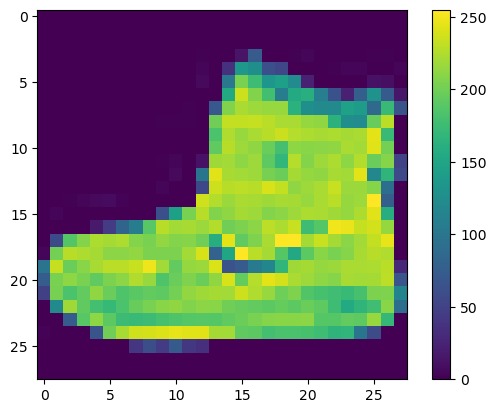

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [9]:
# ToTensor 변환 정의
transform = transforms.ToTensor()

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [10]:
# 정규화 후 텐서 변환
x_train = torch.tensor(x_train / 255, dtype=torch.float32)

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

- PCA는 선형 변환을 통해 데이터를 축소해 전체적인 데이터 분산을 설명
  - - PCA는 주로 해석이 용이
- t-SNE는 비선형 방식으로 고차원 데이터를 저차원 공간에 투영
  - t-SNE는 시각화를 통해 복잡한 패턴을 식별하는데 용이

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [11]:
# x_train, x_test를 reshape하여 PCA를 적용
x_train= x_train.reshape(-1, 784)
x_test= x_test.reshape(-1, 784)

In [12]:
pca = PCA(n_components = 50)

In [13]:
pca.fit(x_train)

PCA(n_components=50)

In [14]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [15]:
print("Explained variance ratio:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: 0.8626318720392704


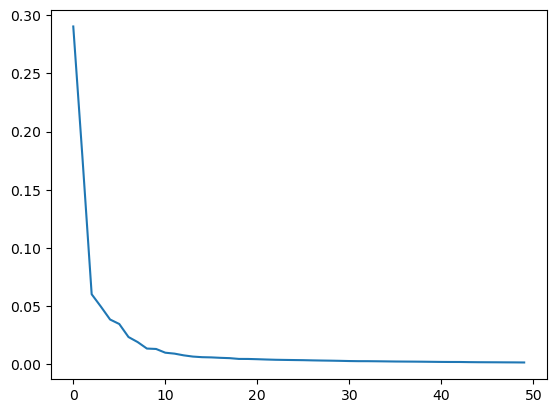

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 10번 째 주성분까지는 사용할만 하지만, 그 이후에는 별로 사용 가치가 없음

### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [17]:
recon_err = pca.inverse_transform(x_train_pca)

In [18]:
mse = mean_squared_error(recon_err, x_train)

In [19]:
print(mse)

0.011951480929771358


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [20]:
pca_2 = PCA(n_components = 30)

In [21]:
pca_2.fit(x_train)

PCA(n_components=30)

In [22]:
x_train_pca2 = pca_2.transform(x_train)

In [23]:
print("Explained variance ratio:", np.sum(pca_2.explained_variance_ratio_))

Explained variance ratio: 0.8207271895148287


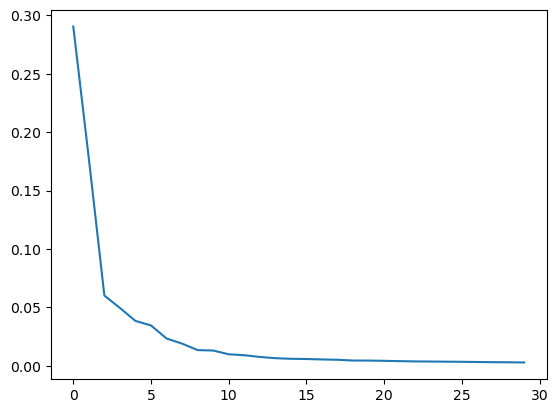

In [24]:
plt.plot(pca_2.explained_variance_ratio_)
plt.show()
# 5~6번 째 주성분까지는 사용할만 하지만, 그 이후에는 별로 사용 가치가 없음

In [25]:
recon_err2 = pca_2.inverse_transform(x_train_pca2)

In [26]:
mse2 = mean_squared_error(recon_err2, x_train)
print(mse2)

0.015598269221364935


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

- 분산과 mse값이 감소하였다
  - mnist에 대한 설명력이 감소

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [27]:
pca_3 = PCA(n_components = 2)

In [28]:
pca_3.fit(x_train)

PCA(n_components=2)

In [29]:
x_train_pca3 = pca_3.transform(x_train)

In [30]:
print("Explained variance ratio:", np.sum(pca_3.explained_variance_ratio_))

Explained variance ratio: 0.46794537902880806


In [31]:
recon_err3 = pca_3.inverse_transform(x_train_pca3)

In [32]:
mse3 = mean_squared_error(recon_err3, x_train)
print(mse3)

0.046294359466177805


In [ ]:
# 꽤 부정적으로 값이 증가

### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

In [33]:
x_train_pca3.shape

(60000, 2)

In [34]:
print(pca_3.components_.shape)

(2, 784)


In [35]:
x_pic = (pca_3.components_.shape)

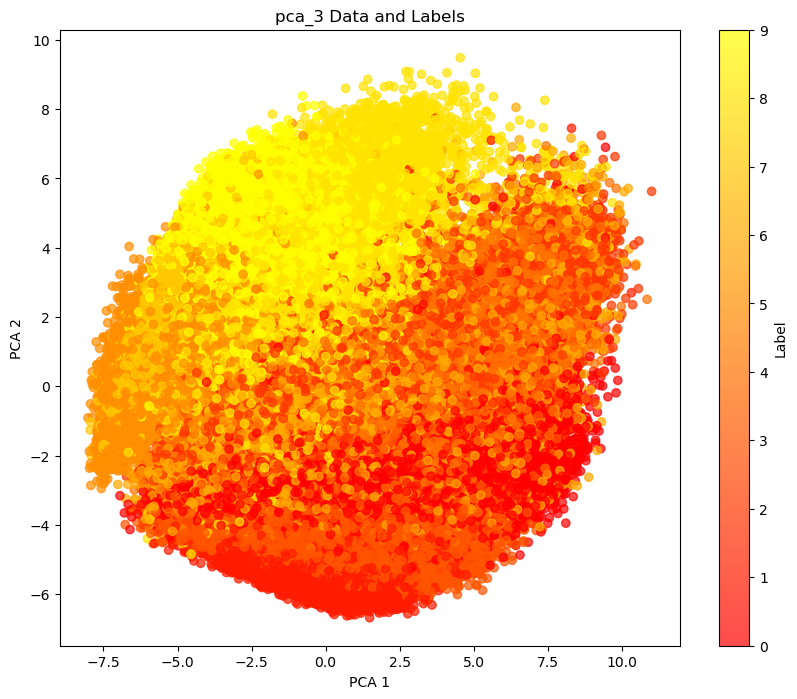

In [36]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_pca3[:, 0], x_train_pca3[:, 1],c=y_train, cmap="autumn", alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("pca_3 Data and Labels")
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

- 노트북이 말썽이라 TSNE가 안됩니다

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [37]:
dbsc = DBSCAN(eps=2.4, min_samples=100)

In [39]:
predict = dbsc.fit(x_train_pca)

In [41]:
y_pred = predict.labels_

In [44]:
print(y_pred)

[-1 -1 -1 ... -1  0  0]


### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [46]:
km = KMeans(n_clusters = 10, random_state = 14)
km.fit(x_train_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=14)

In [48]:
print(km.labels_)

[8 1 4 ... 1 4 4]


### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

In [49]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters = k, random_state = 14)
    km.fit(x_train_pca)
    inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

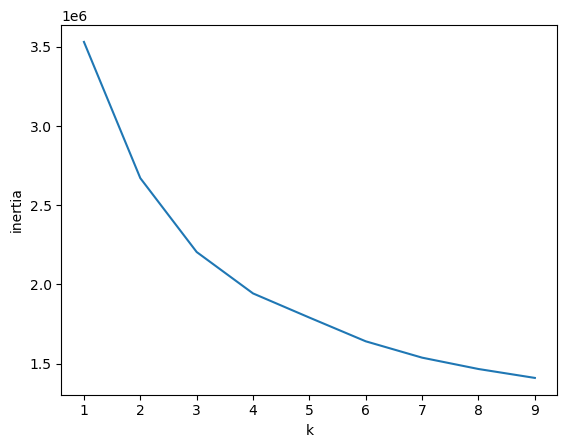

In [50]:
plt.plot(range(1,10), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

- 흠... 4 or 5..?

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

In [51]:
km2 = KMeans(n_clusters = 4, random_state = 14)
km2.fit(x_train_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=14)

In [52]:
# 각 레이블로 모인 샘플 개수 확인
print(np.unique(km2.labels_, return_counts = True))

(array([0, 1, 2, 3]), array([10433, 17543, 15779, 16245], dtype=int64))


In [ ]:
plt.figure(figsize = (10,10))

for label in range(4):
    data = fruits_pca[km2.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(["pineapple", "banana", "apple"])
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.